In [14]:
#Step 1: Install Required Libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [15]:
#Step 2: Load and Inspect the Dataset
import pandas as pd
file_path = "/kaggle/input/imdb-india-movies/IMDb Movies India.csv"
try:
    df = pd.read_csv(file_path, encoding="utf-8")  
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")  
print("✅ Dataset Loaded Successfully!")
print("\nFirst 5 Rows:\n", df.head())
print("\n🔍 Available Columns:\n", df.columns.tolist())

✅ Dataset Loaded Successfully!

First 5 Rows:
                                  Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [16]:
#Step 3: Data Precprocessing
from sklearn.preprocessing import LabelEncoder 
# Check for missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

# Encode categorical columns
label_encoders = {}
categorical_cols = ["Genre", "Director", "Actors"]

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders for future use
    else:
        print(f"⚠️ Warning: Column '{col}' not found in dataset!")

print("\n✅ Data Preprocessing Complete!")




🔍 Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
⚠️ Warning: Column 'Actors' not found in dataset!

✅ Data Preprocessing Complete!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


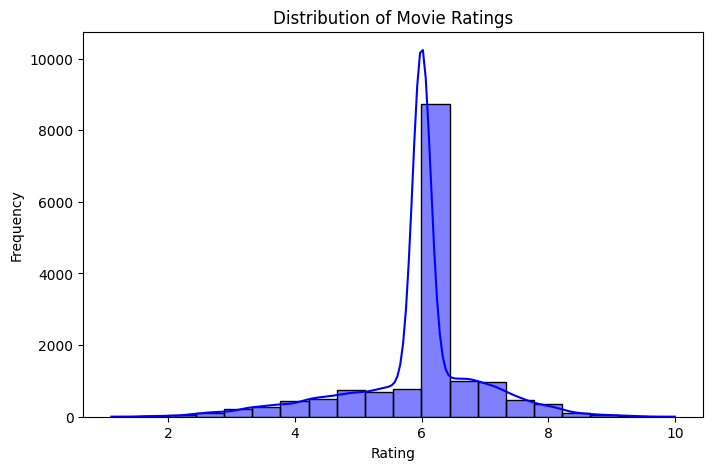

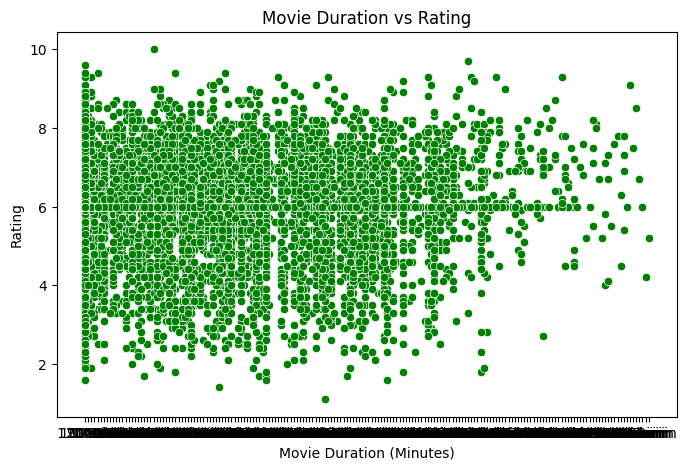

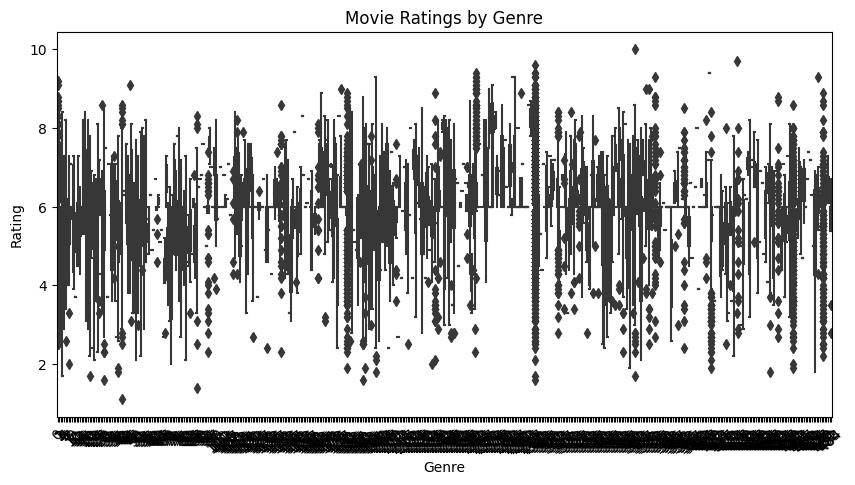

In [17]:
#Step 4: Exploratory Data Analysis (EDA) & Visualizations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=20, kde=True, color="blue")  
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Duration"], y=df["Rating"], color="green")
plt.xlabel("Movie Duration (Minutes)")
plt.ylabel("Rating")
plt.title("Movie Duration vs Rating")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Genre"], y=df["Rating"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Movie Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

In [18]:
# Drop unnecessary columns that are still strings
columns_to_drop = ["Name", "Year"]  # These are not useful for predictions
df = df.drop(columns=columns_to_drop, errors="ignore")

print("\n✅ Dropped unnecessary columns:", columns_to_drop)



✅ Dropped unnecessary columns: ['Name', 'Year']


In [19]:
# Convert 'Duration' column: Remove " min" and convert to float
df["Duration"] = df["Duration"].str.replace(" min", "", regex=True).astype(float)

print("\n✅ 'Duration' column successfully converted to numeric!")



✅ 'Duration' column successfully converted to numeric!


In [20]:
import re
import numpy as np

def clean_votes(value):
    if isinstance(value, str):  # Ensure it's a string
        value = value.replace(",", "")  # Remove commas (e.g., "1,234" → "1234")
        if "M" in value:  # Convert million (M) values to actual numbers
            return float(re.sub(r"[^\d.]", "", value)) * 1_000_000
        elif "K" in value:  # Convert thousand (K) values
            return float(re.sub(r"[^\d.]", "", value)) * 1_000
        else:
            return float(value)  # Convert normal numbers
    return value  # If already a number, return as is

# Apply cleaning function
df["Votes"] = df["Votes"].apply(clean_votes)

print("\n✅ 'Votes' column successfully converted to numeric!")



✅ 'Votes' column successfully converted to numeric!


In [21]:
# Apply One-Hot Encoding
categorical_cols = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n✅ One-Hot Encoding applied successfully!")
print("\n🔍 New DataFrame Shape:", df_encoded.shape)  # Check new column count



✅ One-Hot Encoding applied successfully!

🔍 New DataFrame Shape: (15509, 20850)


In [22]:
print("\n🔍 Data Types After Encoding:\n", df_encoded.dtypes)

# Ensure all features are numeric
assert all(df_encoded.dtypes != "object"), "⚠️ Some features are still non-numeric!"



🔍 Data Types After Encoding:
 Duration                 float64
Rating                   float64
Votes                    float64
Genre_1                     bool
Genre_2                     bool
                          ...   
Actor 3_Zoya Hussain        bool
Actor 3_Zubeida             bool
Actor 3_Zuber K. Khan       bool
Actor 3_Zulfi Sayed         bool
Actor 3_Zunaid Memon        bool
Length: 20850, dtype: object


In [23]:
#Step 5: Train the Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
features = df_encoded.drop(columns=["Rating"]).columns  # Use all columns except the target
X = df_encoded[features]  # Feature set
y = df_encoded["Rating"]  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data split into training and testing sets successfully!")

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)  # ✅ Now it will train successfully!

# Make predictions
y_pred = rf_model.predict(X_test)

print("\n✅ Model trained successfully with One-Hot Encoded features!")


#Step 6: Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print results
print(f"\n✅ Model Performance Metrics:")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"📌 Mean Absolute Percentage Error (MAPE): {mape:.4%}")




✅ Data split into training and testing sets successfully!

✅ Model trained successfully with One-Hot Encoded features!

✅ Model Performance Metrics:
📉 Mean Absolute Error (MAE): 0.5174
📊 Mean Squared Error (MSE): 0.8336
📈 Root Mean Squared Error (RMSE): 0.9130
🎯 R² Score: 0.1428
📌 Mean Absolute Percentage Error (MAPE): 11.0402%


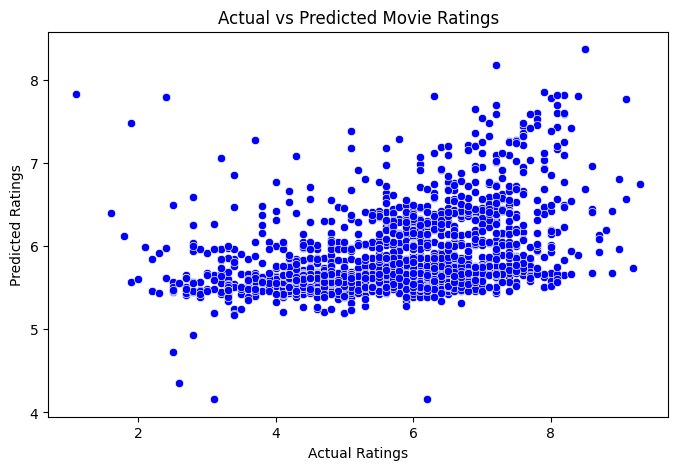

In [24]:
#Step 7: Visualize Model Performance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()



In [29]:
#Step 8: Make Predictions on New Movies
import pandas as pd

# Example input for prediction (New Movie)
sample_movie = {
    "Genre": 3, "Director": 15, "Actor 1": 27, "Actor 2": 9, "Actor 3": 14,
    "Duration": 120, "Votes": 50000
}

# Convert dictionary to DataFrame
input_df = pd.DataFrame([sample_movie])

# **Apply One-Hot Encoding like training data**
input_df_encoded = pd.get_dummies(input_df)

# **Ensure all missing columns are added efficiently**
missing_cols = list(set(rf_model.feature_names_in_) - set(input_df_encoded.columns))

# **Create missing columns with default value 0**
missing_df = pd.DataFrame(0, index=input_df_encoded.index, columns=missing_cols)

# **Concatenate encoded input with missing columns**
input_df_encoded = pd.concat([input_df_encoded, missing_df], axis=1)

# **Ensure correct column order matching training**
input_df_encoded = input_df_encoded[rf_model.feature_names_in_]

# **Make prediction**
predicted_rating = rf_model.predict(input_df_encoded)

# **Display result**
print(f"\n🔍 Predicted IMDb Rating for the movie: {predicted_rating[0]:.2f}")



🔍 Predicted IMDb Rating for the movie: 7.58
